## Classifying Movie Reviews

Binary Classification on IMDB Dataset

Inputs: 50,000 Reviews

Output: Positive and Negative

**Sentiment Analysis**

Analysing a given set of words to predict the sentiment in the paragraph.

**IMDB Large Movie Dataset**

- The dataset has a huge number of 50,000 reviews
- All of these reviews are in English, polarised labelled reviews

**Load the IMDB Dataset With Keras**
- Keras provides access to the IMDB dataset built-in.

- The keras.datasets.imdb.load_data() allows you to load the dataset in a format that is ready for use in neural network and deep learning models.

- The words have been replaced by integers that indicate the absolute popularity of the word in the dataset. The sentences in each review are therefore comprised of a sequence of integers.

In [24]:
from keras.datasets import imdb

## Data Preperation

In [25]:
(( XT,YT), (Xt,Yt)) = imdb.load_data(num_words = 10000)

In [26]:
import numpy as np
print(len(XT))
print(len(Xt))
print(XT[0])

25000
25000
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


To check how the data looks like we use get_word_index() which returns word index dictionary


In [27]:
word_idx = imdb.get_word_index()
# print(word_idx.items())

In [28]:
idx_word = dict([val,key] for (key,val) in word_idx.items())
# print(idx_word.items())

In [29]:
actual_review = ' '.join([idx_word.get(idx-3,'?') for idx in XT[0]])
actual_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [30]:
# Next Step -  Vectorize the Data
# Vocab size - 10,000 we will make every sentence is represented by vector of len 10k [0010100..1....1..0..1..]

def vectorize_sentences(sentences,dim = 10000):
  outputs = np.zeros((len(sentences),10000))

  for i,idx in enumerate(sentences):
    
    outputs[i,idx] = 1

  return outputs

In [31]:
X_train = vectorize_sentences(XT)
X_test = vectorize_sentences(Xt)
print(X_train.shape)
print(X_train[0].shape)
X_train[0]

(25000, 10000)
(10000,)


array([0., 1., 1., ..., 0., 0., 0.])

In [32]:
print(YT.shape)

(25000,)


In [33]:
#converting YT,Yt to numpy array
Y_train = np.asarray(YT).astype('float32')
Y_test = np.asarray(Yt).astype('float32')
print(Y_train.shape)

(25000,)


### Define Your Model Architecture
-  Use fully connected/Dense Layers with ReLu Activation
- 2 Hidden Layers with 16 Units each
- 1 Output layer with 1 unit(Sigmoid function)

In [34]:
from keras import models
from keras.layers import Dense

In [35]:
#define the model
model = models.Sequential()
model.add( Dense ( 16,activation = 'relu',input_shape = (10000,) ) )
model.add(Dense(16,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [36]:
# Compile the model
model.compile(optimizer='rmsprop' , loss = 'binary_crossentropy',metrics =['accuracy'])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


## Training and Validation

Out of 25000 training points ,lets pick first 5000 for validation and 20k for training

In [38]:
x_val = X_train[:5000]
x_train_new = X_train[5000:]

y_val = Y_train[:5000]
y_train_new = Y_train[5000:]


In [39]:
hist = model.fit(x_train_new , y_train_new , epochs = 15, batch_size = 512 , validation_data=(x_val,y_val) )

Epoch 1/15
40/40 [==============================] - 1s 20ms/step - loss: 0.5086 - accuracy: 0.7901 - val_loss: 0.3731 - val_accuracy: 0.8768
Epoch 2/15
40/40 [==============================] - 1s 14ms/step - loss: 0.2954 - accuracy: 0.9042 - val_loss: 0.2915 - val_accuracy: 0.8882
Epoch 3/15
40/40 [==============================] - 1s 15ms/step - loss: 0.2191 - accuracy: 0.9262 - val_loss: 0.2708 - val_accuracy: 0.8950
Epoch 4/15
40/40 [==============================] - 1s 14ms/step - loss: 0.1723 - accuracy: 0.9425 - val_loss: 0.2933 - val_accuracy: 0.8826
Epoch 5/15
40/40 [==============================] - 1s 14ms/step - loss: 0.1452 - accuracy: 0.9510 - val_loss: 0.3167 - val_accuracy: 0.8804
Epoch 6/15
40/40 [==============================] - 1s 14ms/step - loss: 0.1239 - accuracy: 0.9584 - val_loss: 0.2932 - val_accuracy: 0.8908
Epoch 7/15
40/40 [==============================] - 1s 14ms/step - loss: 0.1043 - accuracy: 0.9660 - val_loss: 0.3128 - val_accuracy: 0.8882
Epoch 8/15
40

## Visualise our results


In [40]:
import matplotlib.pyplot as plt


In [41]:
h = hist.history


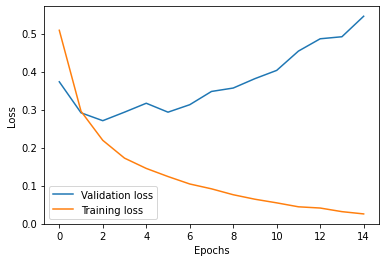

In [42]:
plt.plot(h['val_loss'] , label = "Validation loss")
plt.plot(h['loss'] , label = "Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

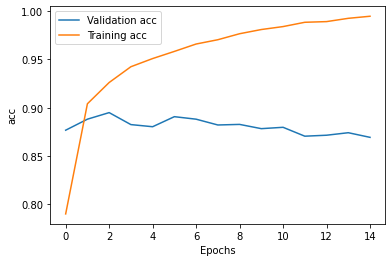

In [43]:
plt.plot(h['val_accuracy'] , label = "Validation acc")
plt.plot(h['accuracy'] , label = "Training acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

In [44]:
model.evaluate(X_train ,Y_train)[1]


782/782 [==============================] - 2s 2ms/step - loss: 0.1221 - accuracy: 0.9720


0.9720399975776672

In [45]:
model.evaluate(X_test,Y_test)[1]


782/782 [==============================] - 2s 2ms/step - loss: 0.6249 - accuracy: 0.8524


0.852400004863739

In [46]:
model.predict(X_test)

array([[0.01379069],
       [0.9999782 ],
       [0.00818369],
       ...,
       [0.05539695],
       [0.00954405],
       [0.63640785]], dtype=float32)